In [1]:
import spotipy as sp
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [211]:
# get spotify artist data
def get_client():
    """
    Returns the spotipy client, used to make requests to the Spotify API.
    """
    return sp.Spotify(client_credentials_manager=SpotifyClientCredentials())

In [212]:
# Load Spotify id csv
with open('/Users/davis/Downloads/artist-uris.csv.csv') as csv:
    uri_df = pd.read_csv(csv)

In [214]:
uri_df.columns = ['name', 'id']

In [216]:
uri_df['id'] = uri_df['id'].map(lambda x: x.split(":")[2])

In [217]:
uri_df[uri_df['name'] == 'Still Woozy'].values[0][1]

'4iMO20EPodreIaEl8qW66y'

In [218]:
with open('top_100_artists.csv') as csv_two:
    artist_df = pd.read_csv(csv_two)

In [220]:
artist_df = artist_df.drop(['Unnamed: 0', 'frequency'], axis=1)

In [221]:
artist_df

,id,artist
0,3TVXtAsR1Inumwj472S9r4,Drake
1,3WrFJ7ztbogyGnTHbHJFl2,The Beatles
2,1Xyo4u8uXC1ZmMpatF05PJ,The Weeknd
3,1uNFoZAHBGtllmzznpCI3s,Justin Bieber
4,4gzpq5DPGxSnKTe4SA8HAU,Coldplay
...,...,...
95,4IWBUUAFIplrNtaOHcJPRM,James Arthur
96,1yqxFtPHKcGcv6SXZNdyT9,MK
97,2qxJFvFYMEDqd7ui6kSAcq,Zedd
98,5m8H6zSadhu1j9Yi04VLqD,Sly & The Family Stone


In [222]:
artist_data = [generate_artist(x, client) for x in artist_df['id']]

In [233]:
more_artists = []

for artist in artist_data:
    related = artist.related_artists
    for r_name in related:
        if r_name not in [x.name for x in artist_data]:
            # get id from csv
            try:
                rel_id = uri_df[uri_df['name'] == r_name].values[0][1]
                temp_artist = generate_artist(rel_id, client)
                more_artists.append(temp_artist)
                print(temp_artist.name)
            except:
                pass

J. Cole
Wale
Jeremih
Rick Ross
John Lennon
George Harrison
Paul McCartney
Ringo Starr
The Beach Boys
Frank Ocean
A$AP Rocky
Childish Gambino
Miguel
ZAYN
Fifth Harmony
Camila Cabello
Bazzi
Keane
Bastille
OneRepublic
Tom Odell
Ellie Goulding
James TW
Jessie J
Sean Kingston
Olly Murs
Christina Perri
Jennifer Lopez
The Pussycat Dolls
Fergie
Louis Tomlinson
The Wanted
Big Time Rush
Selena Gomez & The Scene
Little Mix
Bazzi
Sabrina Claudio
Ella Mai
Kiana Ledé
Rita Ora
Years & Years
Ellie Goulding
YNW Melly
Kodak Black
21 Savage
Steve Miller Band
Steely Dan
Tom Petty and the Heartbreakers
The Doobie Brothers
Eagles
Takeoff
A$AP Mob
NAV
Sia
Jessie J
Leona Lewis
Kelly Clarkson
Emeli Sandé
The Isley Brothers
Commodores
The Temptations
Bill Withers
Camila Cabello
Fifth Harmony
ZAYN
Alessia Cara
Billy Joel
Chicago
Wings
Electric Light Orchestra
NAV
Metro Boomin
James TW
Alessia Cara
Rita Ora
Calum Scott
Dillon Francis
Lost Kings
RL Grime
Loud Luxury
Flosstradamus
Kodak Black
NAV
Famous Dex
Jason M

In [236]:
artist_data.extend(more_artists)

In [240]:
artist_data = list(set(artist_data))

In [185]:
woozy = generate_artist('4iMO20EPodreIaEl8qW66y', client)

In [283]:
def add_artist(artist, arr):
    if artist.name not in [x.name for x in arr]:
        arr.append(artist)
        print("Added", artist)
        arr = list(set(arr))

In [272]:
def add_related_artists(artist_id, client, arr):
    woozy = generate_artist(artist_id, client)
    add_artist(woozy, arr)
    print("Adding artists similar to: ", woozy)
    rel = []
    for r_name in woozy.related_artists:
        if r_name not in [x.name for x in arr]:
                # get id from csv
                try:
                    rel_id = uri_df[uri_df['name'] == r_name].values[0][1]
                    temp_artist = generate_artist(rel_id, client)
                    rel.append(temp_artist)
                    print(temp_artist.name)
                except:
                    pass
    arr.extend(rel)
    arr = list(set(arr))
    
# add_related_artists('4iMO20EPodreIaEl8qW66y', client, artist_data)

In [423]:
artist_name = "Jerry Folk"
try:
    rel_id = uri_df[uri_df['name'] == artist_name].values[0][1]
    add_related_artists(rel_id, client, artist_data)
except:
    rel_id = input("Put the id of the artist here: ")
    add_related_artists(rel_id, client, artist_data)

Put the id of the artist here: 2pAWfrd7WFF3XhVt9GooDL
Added MF DOOM
Adding artists similar to:  MF DOOM
King Geedorah
Madvillain
Viktor Vaughn
KMD
Quasimoto


In [424]:
len(artist_data)

738

In [425]:
artist_data[-5:]

[King Geedorah, Madvillain, Viktor Vaughn, KMD, Quasimoto]

In [190]:
woozy_rel = []
for r_name in woozy.related_artists:
    if r_name not in [x.name for x in artist_data]:
            # get id from csv
            try:
                rel_id = uri_df[uri_df['name'] == r_name].values[0][1]
                temp_artist = generate_artist(rel_id, client)
                woozy_rel.append(temp_artist)
                print(temp_artist.name)
            except:
                pass

Gus Dapperton
The Marías
Roy Blair


In [191]:
artist_data.extend(woozy_rel)

In [193]:
artist_data[-3:]

[Gus Dapperton, The Marías, Roy Blair]

In [194]:
woozy_rel = []
for artist in artist_data[-3:]:
    related = artist.related_artists
    for r_name in related:
        if r_name not in [x.name for x in artist_data]:
            # get id from csv
            try:
                rel_id = uri_df[uri_df['name'] == r_name].values[0][1]
                temp_artist = generate_artist(rel_id, client)
                woozy_rel.append(temp_artist)
                print(temp_artist.name)
            except:
                pass

No Vacation
Her's
No Vacation
Vansire
Hot Flash Heat Wave
Kid Bloom
Jelani Aryeh


In [206]:
artist_data.extend(woozy_rel)

In [197]:
len(artist_data)

500

In [205]:
artist_data = artist_data[:-1]

In [207]:
artist_data = [x for x in artist_data if ]

396

In [180]:
untracked = []
for artist in artist_data:
    related = artist.related_artists
    for rel_name in related:
        if rel_name not in [x.name for x in artist_data]:
            untracked.append(rel_name)

In [181]:
len(untracked)

1184

In [184]:
'21 Savage' in untracked

True

In [137]:
uri_df.columns = ['name', 'uri']

In [138]:
uri_df[uri_df['name'] == 'Zzzzra']

,name,uri
81050,Zzzzra,spotify:artist:0Z1HUzAek6bJBuBhz8mx0q


In [139]:
uri_df = uri_df[600:81050]

In [141]:
uri_df['uri'] = uri_df['uri'].map(lambda x: x.split(":")[2])

In [142]:
uri_df

,name,uri
600,A 1,6ksQZaYQrmmbUoHintAkDR
601,A Band Called Quinn,51NfH1JXw6QmqL21saGv9A
602,A Band Of Bees,56989ldWWzK8dAQAbazmBp
603,A Band of Bitches,6IIEBd4VQjxwVMJNJuOlCB
604,A Billion Robots,5Ej5WAFDBjdPEJWn1NNizV
...,...,...
81045,Zzbra,0ikbQtussQfljjufJ7xwOj
81046,ZZT,2gv0vhtUiUJeGcYkTybo7G
81047,Zzz,4l3D6hPO2o6DgFzkitQ3s7
81048,zZz,1IPih6T0akbF3u4ooYrPxC


In [14]:
client = get_client()

In [431]:
class Artist:
    def __init__(self, name, url, sp_id, genres, related_artists, popularity=-1):
        self.name = name
        self.genres = genres
        self.url = url
        self.sp_id = sp_id
        self.related_artists = related_artists
        self.popularity = popularity
        
    def __str__(self):
        return self.name
    
    def __repr__(self):
        return self.name
    
    def __eq__(self, other):
        return self.sp_id == other.sp_id

    def __hash__(self):
        return hash(('name', self.name, 'sp_id', self.sp_id))

In [118]:
def generate_artist(artist_id, client):
    """
    Creates a new Artist object given Artist spotify id
    """
    artist = client.artist(artist_id)
    related_artists = client.artist_related_artists(artist_id)['artists']
    obj = Artist(artist['name'],
                 artist['external_urls']['spotify'],
                 artist['id'], artist['genres'],
                 [x['name'] for x in related_artists][:5],
                 artist['popularity'])
    return obj

In [119]:
test = generate_artist("3dz0NnIZhtKKeXZxLOxCam", client)
test

Porter Robinson

In [120]:
vars(test)

{'name': 'Porter Robinson',
 'genres': ['big room',
  'brostep',
  'complextro',
  'edm',
  'electro house',
  'moombahton',
  'progressive electro house'],
 'url': 'https://open.spotify.com/artist/3dz0NnIZhtKKeXZxLOxCam',
 'sp_id': '3dz0NnIZhtKKeXZxLOxCam',
 'related_artists': ['Virtual Self',
  'Madeon',
  'Feed Me',
  'Wolfgang Gartner',
  'Kill The Noise'],
 'popularity': 66}

In [16]:
def get_artist_related_artists(artist_id, client):
    related_artists = client.artist_related_artists(artist_id)
    return related_artists['artists']

In [82]:
def recurse_related_artists(artist_id_seed, arr, client):
    """
    Generate a whole bunch of artist ID's for data
    :param artist_id_seed: The artist ID for whom we are getting related information
    :param arr: The array containing a whole bunch of similar artists
    """
    rel = get_artist_related_artists(artist_id_seed, client)
    # Start with one artist
#     if not rel or len(arr) > 50:
#         return arr
    
    for i, r in enumerate(rel):
        # print(i)
        temp_artist = Artist(r['name'], r['external_urls']['spotify'], r['id'], r['genres'], None)
        # arr.append(temp_artist)
        related_artists = get_artist_related_artists(r['id'], client)
        artist_ids = [x['id'] for x in related_artists]
        # print([x['name'] for x in related_artists])
        if temp_artist.sp_id not in [x.sp_id for x in arr]:
            arr.append(temp_artist)
            recurse_related_artists(temp_artist.sp_id, arr, client)

In [436]:
out_df = pd.DataFrame.from_records([vars(s) for s in artist_data])

In [449]:
out_df[10:20]

,name,genres,url,sp_id,related_artists,popularity
10,Rick Ross,"[dirty south rap, gangster rap, hip hop, pop r...",https://open.spotify.com/artist/1sBkRIssrMs1Ab...,1sBkRIssrMs1AbVkOJbc7a,"[DJ Drama, Ace Hood, Young Money, Birdman, Jim...",81
11,DNCE,"[dance pop, pop, pop dance, pop rock, post-tee...",https://open.spotify.com/artist/6T5tfhQCknKG4U...,6T5tfhQCknKG4UnH90qGnz,"[Liam Payne, Demi Lovato, ZAYN, Fifth Harmony,...",70
12,Kid Cudi,"[hip hop, ohio hip hop, pop rap, rap]",https://open.spotify.com/artist/0fA0VVWsXO9YnA...,0fA0VVWsXO9YnASrzqfmYu,"[KIDS SEE GHOSTS, Lupe Fiasco, Pusha T, ScHool...",82
13,Toni Braxton,"[dance pop, hip pop, neo soul, new jack swing,...",https://open.spotify.com/artist/3X458ddYA2YcVW...,3X458ddYA2YcVWuVIGGOYe,"[Deborah Cox, Monica, Tamia, Brandy, Faith Evans]",68
14,Swae Lee,"[melodic rap, pop rap, rap, trap]",https://open.spotify.com/artist/1zNqQNIdeOUZHb...,1zNqQNIdeOUZHb8zbZRFMX,"[Quality Control, Huncho Jack, Desiigner, Mike...",85
15,Iggy Azalea,"[australian hip hop, dance pop, hip pop, pop, ...",https://open.spotify.com/artist/5yG7ZAZafVaAlM...,5yG7ZAZafVaAlMTeBybKAL,"[Azealia Banks, Kreayshawn, Brooke Candy, Nick...",75
16,Shawn Mendes,"[canadian pop, dance pop, pop, post-teen pop, ...",https://open.spotify.com/artist/7n2wHs1TKAczGz...,7n2wHs1TKAczGzO7Dd2rGr,"[ZAYN, Liam Payne, Niall Horan, Bazzi, Camila ...",91
17,Robin Thicke,"[dance pop, hip pop, neo soul, pop dance, r&b,...",https://open.spotify.com/artist/0ZrpamOxcZybMH...,0ZrpamOxcZybMHGg1AYtHP,"[Jon B., Donell Jones, Maxwell, Anthony Hamilt...",67
18,Pharrell Williams,[pop rap],https://open.spotify.com/artist/2RdwBSPQiwcmiD...,2RdwBSPQiwcmiDo9kixcl8,"[N.E.R.D, Clipse, Jay Electronica, Robin Thick...",81
19,Adele,"[british soul, pop, pop soul, uk pop]",https://open.spotify.com/artist/4dpARuHxo51G3z...,4dpARuHxo51G3z768sgnrY,"[Sia, Jessie J, Leona Lewis, Kelly Clarkson, E...",84


In [450]:
out_df.to_csv('artist_data.csv')

In [5]:
#Load Data
df = pd.read_csv('artist_data.csv')

In [71]:
df[df['name'] == 'David Bowie']['related_artists'].values[0]

"['Lou Reed', 'T. Rex', 'Roxy Music', 'Iggy Pop', 'Talking Heads']"

In [12]:
df[df['name'] == 'Emeli Sandé']['related_artists'].values[0]

"['Rebecca Ferguson', 'Paloma Faith', 'Ella Henderson', 'Leona Lewis', 'Alexandra Burke']"

In [26]:
data = pd.read_csv('../finalproject/matrix.txt', sep=" ", header=None)

In [27]:
data

,0,1,2,3,4,5,6,7,8,9,...,729,730,731,732,733,734,735,736,737,738
0,0,4,4,100000000,100000000,100000000,100000000,100000000,100000000,100000000,...,100000000,100000000,100000000,100000000,100000000,100000000,100000000,100000000,100000000,NaN
1,4,0,3,100000000,100000000,100000000,100000000,100000000,100000000,100000000,...,100000000,100000000,100000000,100000000,100000000,100000000,100000000,100000000,100000000,NaN
2,4,3,0,100000000,100000000,100000000,100000000,100000000,100000000,100000000,...,100000000,100000000,100000000,100000000,100000000,100000000,100000000,100000000,100000000,NaN
3,100000000,100000000,100000000,0,100000000,82,63,71,77,100,...,100000000,136,105,101,111,88,112,93,82,NaN
4,100000000,100000000,100000000,100000000,0,100000000,100000000,100000000,100000000,100000000,...,100000000,100000000,100000000,100000000,100000000,100000000,100000000,100000000,100000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,100000000,100000000,100000000,111,100000000,63,64,72,72,77,...,100000000,132,6,65,0,86,107,85,72,NaN
734,100000000,100000000,100000000,88,100000000,68,39,40,71,58,...,100000000,74,80,56,86,0,89,18,19,NaN
735,100000000,100000000,100000000,112,100000000,78,65,71,87,96,...,100000000,79,101,97,107,89,0,86,85,NaN
736,100000000,100000000,100000000,93,100000000,70,47,39,78,60,...,100000000,71,79,55,85,18,86,0,37,NaN


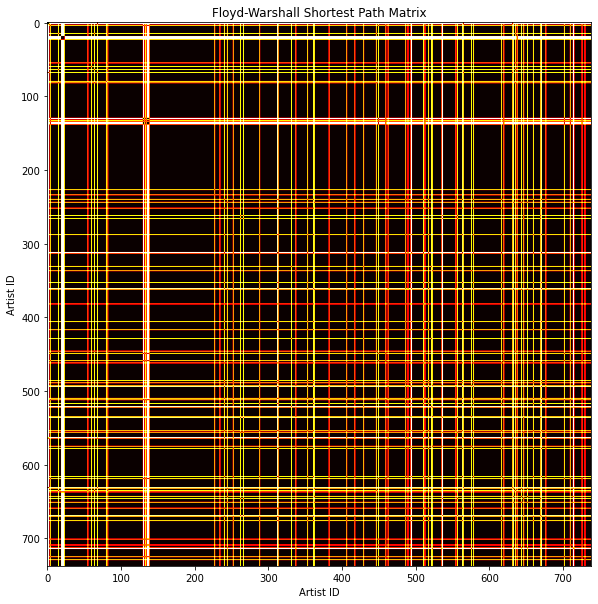

In [49]:
import matplotlib.pyplot as plt
import numpy as np

a = data
plt.figure(figsize=(18,10))
plt.imshow(a, cmap='hot')
plt.title('Floyd-Warshall Shortest Path Matrix')
plt.xlabel('Artist ID')
plt.ylabel('Artist ID')
plt.savefig('matrix.png')

In [57]:
central = """
2 Chainz : 3455
21 Savage : 800
24kGoldn : 12354
3OH!3 : 4586
6LACK : 268
A Great Big World : 20533
A R I Z O N A : 573
A Rocket To The Moon : 1622
A$AP Mob : 271
A$AP Rocky : 8331
AJ Mitchell : 1511
AJR : 19983
Aaliyah : 520
Ab-Soul : 9303
Ace Hood : 260
Adele : 754
Afrojack : 7367
Alessia Cara : 6284
Alesso : 602
Alex & Sierra : 7642
Alex Newell : 557
Alexi Murdoch : 1122
Alextbh : 58
Alicia Keys : 556
Alison Wonderland : 88
AlunaGeorge : 289
Ameer Vann : 178
American Authors : 25540
Aminé : 6512
Amir Obe : 305
Amos Lee : 2180
Amtrac : 257
Andy Grammer : 3609
Anfa Rose : 237
Anna Clendening : 3427
Anne-Marie : 5059
Anton Powers : 6911
Ariana Grande : 446
Arizona Zervas : 12561
Artist Vs Poet : 2150
Asian Doll : 457
Atlas Genius : 5202
Attom : 9
August Alsina : 2343
Augustana : 115
Ava Max : 4204
Avril Lavigne : 717
B.o.B : 7838
BANNERS : 9138
BLACKPINK : 2
BOYO : 390
BROCKHAMPTON : 7606
BTS : 9
Bad Suns : 387
Ball Park Music : 212
Band of Horses : 66
Banes World : 2014
Basement Jaxx : 574
Bastille : 527
Bazzi : 11287
Bea Miller : 850
Beach Fossils : 156
Becky Hill : 4534
Ben Howard : 2154
Ben Rector : 585
Benjamin Francis Leftwich : 1137
Berhana : 1196
Beyoncé : 23124
Bhad Bhabie : 319
Big Sean : 2093
Big Time Rush : 528
Bill Withers : 315
Billie Eilish : 580
Billy Joel : 26
Birdman : 493
Black Eyed Peas : 829
Blind Pilot : 1691
Blonde : 845
Blossoms : 3
Bombay Bicycle Club : 1135
Brandy : 15935
Breaking Benjamin : 6
Brett Dennen : 875
Brian Fresco : 563
British India : 51
Broken Bells : 1653
Bronze Radio Return : 67
Brooke Hogan : 15
Brooks : 3444
Bruno Mars : 15021
Bryce Vine : 5883
Bryson Tiller : 11598
CHIKA : 1939
CID : 461
COIN : 6061
CRUISR : 716
CVBZ : 6077
Caleborate : 393
Calum Scott : 5074
Calvin Harris : 1084
Cam Meekins : 967
Camila Cabello : 3054
Cardi B : 1448
Carly Rae Jepsen : 1571
Casey Veggies : 3623
Cash Cash : 10791
Catfish and the Bottlemen : 4
Cavetown : 786
Chance the Rapper : 6444
Charlie Puth : 1449
Chase Atlantic : 97
Cheat Codes : 4225
Chelsea Cutler : 7274
Cher Lloyd : 642
Chicago : 60
Chiddy Bang : 5154
Chief Keef : 8363
Childish Gambino : 5129
Chloe x Halle : 8123
Choker : 919
Chris Brown : 494
Chris Webby : 1130
Christian French : 2337
Christina Perri : 16801
Christopher Cross : 17
Circa Waves : 2
Classified : 43
Classixx : 102
Clean Bandit : 8094
Clipse : 2375
Coast Modern : 3193
Cobra Starship : 2234
Cold War Kids : 628
Coldplay : 17657
Colony House : 1510
Colton Dixon : 323
Commodores : 5773
Conan Gray : 161
Courteeners : 651
Craft Spells : 1102
Cream : 6
Cuban Doll : 413
Curbi : 272
Curtis Mayfield : 434
Cute Is What We Aim For : 116
DIIV : 154
DJ Drama : 878
DJ Khaled : 420
DNCE : 22152
DaBaby : 653
DaniLeigh : 1127
Daryl Hall & John Oates : 77
Davai : 150
David Bowie : 7
David Cook : 554
David Gray : 216
David Guetta : 397
Dean Lewis : 248
Declan McKenna : 12779
Demi Lovato : 2870
Dillon Francis : 507
Diplo : 13639
Dirty South : 12
Disciples : 337
Disclosure : 2305
Discovery : 163
Dizzy Wright : 10614
Doja Cat : 4521
Dominic Fike : 3859
Domo Genesis : 282
Don Henley : 39
Don Toliver : 1361
Donnie Trumpet & The Social Experiment : 2323
Drake : 4304
Dua Lipa : 1230
DubVision : 4012
Duke Dumont : 1884
E-Dubble : 304
EARTHGANG : 2144
EMBRZ : 7
EXES : 1416
Eagles : 34
Earl Sweatshirt : 4757
Ed Sheeran : 1333
Edward Sharpe & The Magnetic Zeros : 2849
Ekali : 504
Electric Light Orchestra : 7
Ella Eyre : 6522
Ella Henderson : 8578
Ella Mai : 541
Ella Vos : 3132
Ellie Goulding : 17857
Elton John : 130
Emeli Sandé : 3514
Empire of the Sun : 1185
En Vogue : 353
Eric Nam : 4
FIL BO RIVA : 384
FLETCHER : 1577
FRENSHIP : 6933
Faces : 2
Family of the Year : 1105
Famous Dex : 1111
Far East Movement : 3263
Fergie : 2867
Fifth Harmony : 36433
Firebeatz : 120
Fitz and The Tantrums : 198
Five For Fighting : 684
Fleetwood Mac : 27
Flipp Dinero : 4827
Flo Rida : 311
Flobots : 101
Flosstradamus : 222
Flume : 5497
Foster The People : 3909
Four Tops : 570
Frank Ocean : 36891
Fredo Santana : 327
French Montana : 6246
Funkadelic : 565
Future : 6506
Futuristic : 503
G-Eazy : 2458
Galantis : 11158
Gavin DeGraw : 1838
Gavin James : 220
George Ezra : 673
George Harrison : 9
Ginuwine : 183
Girls Aloud : 579
Gladys Knight & The Pips : 3379
Golden Vessel : 7
Goldroom : 96
Gorgon City : 1777
Great Good Fine Ok : 72
Gregory Alan Isakov : 770
Grizfolk : 584
Grouplove : 10576
Gryffin : 551
Gunna : 5984
Gus Dapperton : 3369
Gwen Stefani : 394
Gym Class Heroes : 2645
H.E.R. : 617
HUNNY : 12674
Hailee Steinfeld : 919
Halsey : 5140
Harry Styles : 936
Heidi Montag : 282
Hellogoodbye : 126
Her's : 1496
Hey Monday : 264
Hoobastank : 3
Hoodie Allen : 3044
Hootie & The Blowfish : 114
Hot Chelle Rae : 5065
Hot Chip : 136
Hot Flash Heat Wave : 1120
Hozier : 7058
Huey Lewis & The News : 20
Huey Mack : 139
I DONT KNOW HOW BUT THEY FOUND ME : 601
IDK : 124
Iggy Azalea : 1174
Imagine Dragons : 1009
Inner Wave : 377
Internet Money : 1005
Iyaz : 970
J. Cole : 2085
JP Cooper : 240
Jack Johnson : 692
Jagged Edge : 24
Jai Wolf : 11
Jakob Ogawa : 705
James Arthur : 1040
James Bay : 6299
James Morrison : 294
James TW : 1834
Jamie T : 557
Jamie xx : 374
Jamila Woods : 782
Janet Jackson : 14085
Jason Derulo : 1831
Jason Mraz : 4870
Jax Jones : 8571
Jay Electronica : 502
Jay Sean : 358
Jaymes Young : 7365
Jazmine Sullivan : 715
Jelani Aryeh : 187
Jennifer Hudson : 2004
Jennifer Lopez : 10724
Jeremih : 3656
Jeremy Zucker : 4011
Jess Glynne : 3006
Jessie J : 11327
Jessie Reyez : 493
Jimi Hendrix : 3
Joe Purdy : 678
Joel Corry : 1824
Joey Bada$$ : 2976
Joey Purp : 1680
John Lennon : 20
John Mayer : 4050
Joji : 1597
Jon Bellion : 19858
Jonas Blue : 455
Jordan Maxwell : 587
Jorja Smith : 433
Joywave : 2221
Juice WRLD : 1482
Jukebox The Ghost : 721
Julia Michaels : 7424
Justin Bieber : 1034
Justin Stone : 132
KMD : 1
KYLE : 10534
Kali Uchis : 247
Kanye West : 1150
Karen Harding : 918
Kasbo : 63
Kash Doll : 3884
Kaskade : 35
Katy Perry : 1534
Keane : 200
Kehlani : 26672
Kelly Clarkson : 945
Kelly Rowland : 3334
Kendrick Lamar : 5334
Kenny Loggins : 11
Kesha : 2228
Kevin Abstract : 16244
Kevin Rudolf : 3290
Key Glock : 4380
Keyshia Cole : 229
Khalid : 13419
Kiana Ledé : 7541
Kid Bloom : 1177
Kid Cudi : 398
Kid Ink : 641
Kid Quill : 23175
Kidswaste : 11
King Geedorah : 3
Kodak Black : 1278
Kool & The Gang : 10769
Kota the Friend : 699
Krewella : 418
Kris Allen : 90
Kygo : 569
Kyle Dion : 57
L D R U : 486
LANY : 1239
LMFAO : 2952
Lady Gaga : 552
Laidback Luke : 120
Landon Cube : 11553
Last Dinosaurs : 870
Lauv : 1724
Lee DeWyze : 89
Leona Lewis : 10797
Lewis Del Mar : 416
Liam Payne : 992
Lifehouse : 565
Lil Baby : 654
Lil Durk : 5556
Lil Reese : 546
Lil Wayne : 2756
Lime Cordiale : 77
Limp Bizkit : 4
Lindsay Lohan : 919
Linkin Park : 5
Little Mix : 3311
Lizzo : 771
Lloyd : 633
Local Natives : 2587
Logic : 11106
Lorde : 785
Lost Frequencies : 281
Lost Kings : 5936
Lou Reed : 4
Loud Luxury : 10343
Louis Tomlinson : 743
Lucas & Steve : 407
Lucidious : 207
Luke Christopher : 4725
Luna Shadows : 144
Lupe Fiasco : 1764
Lute : 1497
Luther Vandross : 329
M-22 : 311
M.O : 654
MAX : 543
MF DOOM : 4
MGMT : 2991
MK : 615
MKTO : 12365
MNEK : 865
Mabel : 3751
Macklemore : 880
Macklemore & Ryan Lewis : 1881
Madeon : 190
Madison Beer : 1060
Madison Mars : 454
Madvillain : 5
Maggie Lindemann : 2858
Majid Jordan : 1310
Mario : 1414
Mark Ronson : 2910
Maroon 5 : 24223
Marshmello : 234
Martin Jensen : 4380
Marvin Gaye : 385
Mat Kearney : 630
Matchbox Twenty : 21
Matoma : 2267
Matt Champion : 279
Matt and Kim : 796
Meek Mill : 1512
Megan Thee Stallion : 980
Meghan Trainor : 4191
Melanie Martinez : 395
Mellow Fellow : 48
MellowHype : 30
Meltycanon : 6478
Mereba : 36
Metro Boomin : 4122
Metro Station : 329
Miami Horror : 769
Michael Jackson : 12966
Mick Jenkins : 2068
Miguel : 836
Miike Snow : 1176
Mike Perry : 1213
Miley Cyrus : 1406
Milky Chance : 1661
Mokita : 769
Moosh & Twist : 2877
Morgan Page : 9
Mounika. : 94
Mumford & Sons : 776
Möwe : 1
N.E.R.D : 243
NAV : 5965
NF : 430
NLE Choppa : 1442
Natasha Bedingfield : 859
Nate Good : 16691
Nelly Furtado : 308
Neon Indian : 63
Neon Trees : 21244
New Boyz : 14194
New Politics : 472
Niall Horan : 500
Nick Jonas : 671
Nick Murphy : 330
Nicki Minaj : 36999
Nicky Romero : 477
Nicole Scherzinger : 14078
Night Riots : 10697
Nightly : 1676
No Rome : 505
No Vacation : 322
Noah And The Whale : 94
Noname : 4012
Northeast Party House : 2492
Odd Future : 32
Of Monsters and Men : 2140
Ohio Players : 4106
Oliver Heldens : 1632
Oliver Tree : 643
Ollie MN : 503
Olly Murs : 1273
Omar Apollo : 2380
Omarion : 683
One Direction : 790
OneRepublic : 39316
Owl City : 404
P!nk : 1369
PARTYNEXTDOOR : 296
Packy : 1090
Paloma Faith : 3464
Panama Wedding : 110
Parachute : 8005
Paris Hilton : 2255
Parliament : 647
Passion Pit : 10208
Patrick Stump : 1310
Paul McCartney : 14
Peach Pit : 2869
Penguin Prison : 830
Peter Bjorn and John : 162
Petit Biscuit : 38
Phantogram : 1036
Pharrell Williams : 1724
Philip George : 6069
Phillip Phillips : 6719
Phoebe Ryan : 922
Phoenix : 1457
Pink Guy : 452
Pitbull : 13
Playboi Carti : 7239
Polo G : 1416
Pop Smoke : 2503
Post Malone : 4521
Pusha T : 6206
Quinn XCII : 582
Quintino : 572
Qveen Herby : 518
RAC : 840
RAYE : 1989
RICEWINE : 608
RL Grime : 9356
RM : 5
Ra Ra Riot : 3817
Radical Face : 1499
Rae Sremmurd : 372
Rapsody : 1051
Raveena : 1125
Ray LaMontagne : 508
Razorlight : 81
Rhys Lewis : 403
Rich The Kid : 539
Rick Ross : 10706
Ricky Montgomery : 1985
Rihanna : 8833
Ringo Starr : 47
Rita Ora : 7932
Rixton : 4198
Rob Thomas : 411
Robin Thicke : 648
Robyn : 597
Roddy Ricch : 1978
Roxy Music : 4
Roy Blair : 8355
Roy Woods : 285
Ruel : 3815
Ryan Caraveo : 1840
Ryan Leslie : 509
SAINt JHN : 2158
SBTRKT : 233
SEVENTEEN : 3
SLUMBERJACK : 317
SNBRN : 47
STRFKR : 3975
SUNMI : 2
SZA : 32627
Saba : 1512
Sabrina Claudio : 390
Saint Motel : 1622
Sam Smith : 6497
Samsa : 690
San Cisco : 53
Sasha Sloan : 660
ScHoolboy Q : 1214
Scissor Sisters : 460
Seafret : 4228
Sean Kingston : 12742
Seeb : 7086
Selena Gomez : 1464
Selena Gomez & The Scene : 1794
Shallou : 6
Shawn Mendes : 3919
Sheck Wes : 909
Shiloh Dynasty : 755
Shoffy : 1239
Shy Glizzy : 468
Sia : 9610
Sigala : 18145
Sik World : 134
Ski Mask The Slump God : 621
Skizzy Mars : 11738
Sky Sailing : 7
Sly & The Family Stone : 2676
Smallpools : 1195
Smino : 1524
Smokey Robinson & The Miracles : 876
Solange : 17521
SonReal : 1686
Spose : 38
St. Lucia : 4067
Starley : 225
Steely Dan : 38
Stefflon Don : 400
Stereo Skyline : 447
Steve Miller Band : 10
Steve Winwood : 22
Stevie Wonder : 1249
Still Woozy : 722
Sundara Karma : 5
Swae Lee : 351
T. Rex : 2
T.I. : 106
THEY. : 377
Taio Cruz : 2061
Takeoff : 477
Talking Heads : 5
Tank and The Bangas : 136
Tay-K : 325
Taylor Bennett : 547
Taylor Swift : 941
Tee Grizzley : 4039
The Academy Is... : 372
The Animals : 1
The Beach Boys : 4
The Beatles : 29
The Chainsmokers : 637
The Doobie Brothers : 14
The Downtown Fiction : 384
The Drums : 2366
The Fratellis : 82
The Fray : 6505
The Goo Goo Dolls : 534
The Griswolds : 100
The Head and the Heart : 529
The Honeysticks : 928
The Horrors : 302
The Hunna : 1
The Isley Brothers : 346
The Jacksons : 566
The Jungle Giants : 1953
The Knocks : 1357
The Lumineers : 4035
The Marías : 494
The Meters : 638
The Mowgli's : 393
The Neighbourhood : 7420
The Palmer Squares : 112
The Pigeon Detectives : 139
The Pointer Sisters : 450
The Pussycat Dolls : 1087
The Ready Set : 3543
The Rolling Stones : 6
The Royal Concept : 3177
The Script : 2755
The Summer Set : 609
The Supremes : 376
The Temper Trap : 169
The Temptations : 1257
The Unlikely Candidates : 56
The Vamps : 1131
The Veronicas : 576
The Walters : 1517
The Wanted : 440
The Weeknd : 7975
The Whitest Boy Alive : 471
The Who : 4
The Wombats : 3347
Three Days Grace : 2
Tierra Whack : 2174
Timeflies : 14852
Timmies : 46
Tom Odell : 4313
Tom Petty and the Heartbreakers : 18
Tom Zanetti : 211
Toni Braxton : 314
Tory Lanez : 8378
Towkio : 537
Train : 2889
Transviolet : 145
Travie McCoy : 2025
Travis Scott : 9992
Trey Songz : 2486
Trinix : 8
Trisha Paytas : 226
Troye Sivan : 8315
Two Door Cinema Club : 5265
Ty Dolla $ign : 3129
Tyla Yaweh : 11830
Tyler The Creator : 35
UMI : 1369
UnoTheActivist : 385
Usher : 1340
V : 5
Vacation Manor : 2866
Vance Joy : 1261
Verzache : 1250
Viktor Vaughn : 3
Vince Staples : 1014
Vinyl Theatre : 7463
Viola Beach : 1
Von Wegen Lisbeth : 85
VÉRITÉ : 226
WALK THE MOON : 3296
Wale : 949
Wallows : 2150
Washed Out : 1229
Watsky : 2645
Wax : 165
Wham! : 273
What So Not : 1018
Whitney Houston : 1290
Wild Nothing : 319
Wild Party : 627
Win and Woo : 3
Wings : 111
Wingtip : 153
Witt Lowry : 434
X Ambassadors : 311
YNW Melly : 626
Years & Years : 22443
Yeek : 11592
Yo Gotti : 2446
Yo Trane : 235
Young Money : 14566
Young Nudy : 6151
Young Rising Sons : 3805
Young Thug : 1027
Young the Giant : 6281
Youngblood Hawke : 562
Yung Heazy : 718
ZAYN : 3844
Zack Villere : 1470
Zara Larsson : 10809
Zedd : 9623
blackbear : 442
boy pablo : 3089
gnash : 1744
half•alive : 2987
joan : 1076
khai dreams : 2651
lovelytheband : 12765
mansionz : 857
moow : 26
mxmtoon : 98
rei brown : 3751
sagun : 113
will.i.am : 4334
"""

In [58]:
data_vec = central.split("\n")

In [70]:
l = []
for entry in data_vec[1:]:
    elems = entry.split(" : ")
    if len(elems) == 2:
        name, score = elems
        l.append([name, int(score)])
    
for entry in list(sorted(l, key=lambda x: -x[1])):
    print(entry[0], entry[1])

OneRepublic 39316
Nicki Minaj 36999
Frank Ocean 36891
Fifth Harmony 36433
SZA 32627
Kehlani 26672
American Authors 25540
Maroon 5 24223
Kid Quill 23175
Beyoncé 23124
Years & Years 22443
DNCE 22152
Neon Trees 21244
A Great Big World 20533
AJR 19983
Jon Bellion 19858
Sigala 18145
Ellie Goulding 17857
Coldplay 17657
Solange 17521
Christina Perri 16801
Nate Good 16691
Kevin Abstract 16244
Brandy 15935
Bruno Mars 15021
Timeflies 14852
Young Money 14566
New Boyz 14194
Janet Jackson 14085
Nicole Scherzinger 14078
Diplo 13639
Khalid 13419
Michael Jackson 12966
Declan McKenna 12779
lovelytheband 12765
Sean Kingston 12742
HUNNY 12674
Arizona Zervas 12561
MKTO 12365
24kGoldn 12354
Tyla Yaweh 11830
Skizzy Mars 11738
Bryson Tiller 11598
Yeek 11592
Landon Cube 11553
Jessie J 11327
Bazzi 11287
Galantis 11158
Logic 11106
Zara Larsson 10809
Leona Lewis 10797
Cash Cash 10791
Kool & The Gang 10769
Jennifer Lopez 10724
Rick Ross 10706
Night Riots 10697
Dizzy Wright 10614
Grouplove 10576
KYLE 10534
Loud Lu

Sky Sailing 7
Breaking Benjamin 6
Cream 6
Shallou 6
The Rolling Stones 6
Linkin Park 5
Madvillain 5
RM 5
Sundara Karma 5
Talking Heads 5
V 5
Catfish and the Bottlemen 4
Eric Nam 4
Limp Bizkit 4
Lou Reed 4
MF DOOM 4
Roxy Music 4
The Beach Boys 4
The Who 4
Blossoms 3
Hoobastank 3
Jimi Hendrix 3
King Geedorah 3
SEVENTEEN 3
Viktor Vaughn 3
Win and Woo 3
BLACKPINK 2
Circa Waves 2
Faces 2
SUNMI 2
T. Rex 2
Three Days Grace 2
KMD 1
Möwe 1
The Animals 1
The Hunna 1
Viola Beach 1
